<a href="https://colab.research.google.com/github/FKz11/study_mpei/blob/main/lab2_out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обработка данных лабораторной работы 2

### Загружаем библиотеки

In [153]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Загружаем данные 

In [154]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [155]:
data2_ideal=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab2_in.txt", sep=' ', names=['f2', 'f3', 'f4'], index_col = False)
data2_real=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/brig5_lab2_out.txt", sep=' ', names=['A1', 'A2', 'A3', 'A4', 'A5'], index_col = False)

In [156]:
data2_ideal.head()

,f2,f3,f4
0,-0.944265,2.127559,-0.612497
1,-0.938983,2.127567,-0.617788
2,-0.933689,2.127543,-0.623058
3,-0.928384,2.127488,-0.628308
4,-0.923069,2.127402,-0.633536


In [157]:
data2_real.head()

,A1,A2,A3,A4,A5
0,2.949583,0.190238,-0.437844,1.216504,2.93
1,2.949583,0.190238,-0.437844,1.216504,2.93
2,2.949573,0.190278,-0.437844,1.216261,2.93
3,2.949573,0.191093,-0.437844,1.213274,2.93
4,2.949573,0.195292,-0.437859,1.204845,2.93


In [158]:
dt=0.05
d1=0.033
l1=0.075
l2=0.155
l3=0.135
l45=0.2176

### 1. Постановка задачи как задана траектория (часть таблицы). Что требуется 


# ----------------------

### 2. вывести аналитическое решение связывающее прямую задачу геометрии и обратную (по заданным значениям координат схвата в системе координат x,z найти углы в сочленениях схвата)

# ----------------------

### 3. построить графики изменения углов и обосновать выбор набора углов.

In [159]:
def A_to_f(data):
  data['f1'] = 2.9496 - data['A1']
  data['f2'] = data['A2'] - 1.1345
  data['f3'] = data['A3'] + 2.5654
  data['f4'] = data['A4'] - 1.8290
  data['f5'] = 2.930 - data['A5']
  return data

In [160]:
data2_real = A_to_f(data2_real)
data2_real.head()

,A1,A2,A3,A4,A5,f1,f2,f3,f4,f5
0,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07
1,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07
2,2.949573,0.190278,-0.437844,1.216261,2.93,0.000027,-0.944222,2.127556,-0.612739,1.700000e-07
3,2.949573,0.191093,-0.437844,1.213274,2.93,0.000027,-0.943407,2.127556,-0.615726,1.700000e-07
4,2.949573,0.195292,-0.437859,1.204845,2.93,0.000027,-0.939208,2.127541,-0.624155,1.700000e-07


In [161]:
t = 0
t_list = []
for i in range(len(data2_real)):
  t_list.append(t)
  t += dt
data2_real['t'] = t_list
t -= dt
print(round(t, 12), 'c')
data2_real.head()

20.0 c


,A1,A2,A3,A4,A5,f1,f2,f3,f4,f5,t
0,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07,0.00
1,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07,0.05
2,2.949573,0.190278,-0.437844,1.216261,2.93,0.000027,-0.944222,2.127556,-0.612739,1.700000e-07,0.10
3,2.949573,0.191093,-0.437844,1.213274,2.93,0.000027,-0.943407,2.127556,-0.615726,1.700000e-07,0.15
4,2.949573,0.195292,-0.437859,1.204845,2.93,0.000027,-0.939208,2.127541,-0.624155,1.700000e-07,0.20


In [162]:
def plot_f(df):
  fig, ax = plt.subplots(nrows=5, figsize=(10, 25))
  axs = ax.flatten()
  for i in range(5):

    axs[i].plot(df['t'], df[f'f{i+1}'])
    axs[i].set_title(f"f{i+1}")
    axs[i].set_xlabel("t, c", fontsize=12)
    axs[i].set_ylabel("f, рад.", fontsize=12)
    axs[i].set_xlim(min(df['t']), max(df['t']))
    axs[i].grid()

  plt.subplots_adjust(hspace=0.3)

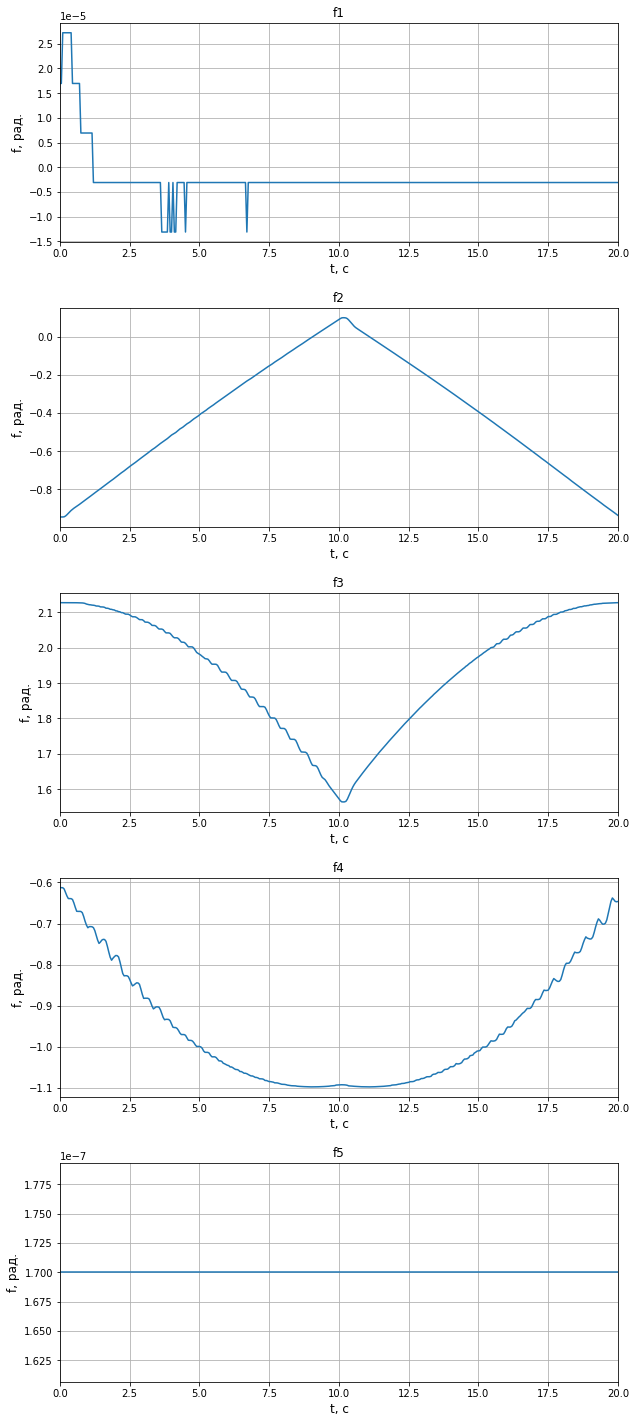

In [163]:
plot_f(data2_real)

### 4. построить полученную траекторию движения и сравнить ее с идеальной траекторией.

In [164]:
def x_z_theta(f2, f3, f4):
  xA = d1 + l2*np.sin(f2) + l3*np.sin(f2 + f3) + l45*np.sin(f2 + f3 + f4)
  zA = l1 + l2*np.cos(f2) + l3*np.cos(f2 + f3) + l45*np.cos(f2 + f3 + f4)
  theta = f2 + f3 + f4 - np.pi/2
  return xA, zA, theta

In [165]:
xA_i, zA_i, theta_i = x_z_theta(data2_ideal['f2'].values, data2_ideal['f3'].values, data2_ideal['f4'].values)
xA_r, zA_r, theta_r = x_z_theta(data2_real['f2'].values, data2_real['f3'].values, data2_real['f4'].values)

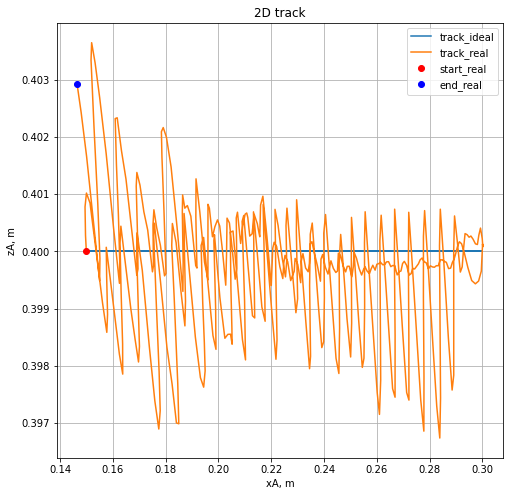

In [166]:
plt.figure(figsize=(8, 8))
plt.plot(xA_i, zA_i, label='track_ideal')
plt.plot(xA_r, zA_r, label='track_real')
plt.plot(xA_r[0], zA_r[0], 'ro', label='start_real')
plt.plot(xA_r[-1], zA_r[-1], 'bo', label='end_real')
plt.title('2D track')
plt.xlabel('xA, m')
plt.ylabel('zA, m')
plt.legend()
plt.grid()
plt.show()

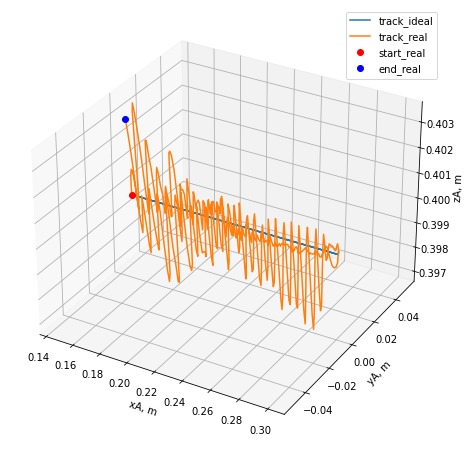

In [167]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")
ax.plot(xA_i, [0]*len(xA_i), zA_i, label='track_ideal')
ax.plot(xA_r, [0]*len(xA_r), zA_r, label='track_real')
ax.plot(xA_r[0], 0, zA_r[0], 'ro', label='start_real')
ax.plot(xA_r[-1], 0, zA_r[-1], 'bo', label='end_real')
ax.set_xlabel('xA, m')
ax.set_ylabel('yA, m')
ax.set_zlabel('zA, m')
ax.legend()
plt.show()

### 5. параметры погрешностей при движении по траектории (см предыдущий семестр)

In [168]:
data2_ideal['xA'], data2_ideal['zA'], data2_ideal['theta'] = xA_i, zA_i, theta_i
data2_real['xA'], data2_real['zA'], data2_real['theta'] = xA_r, zA_r, theta_r

In [169]:
data2_ideal.head()

,f2,f3,f4,xA,zA,theta
0,-0.944265,2.127559,-0.612497,0.15000,0.4,-1.0
1,-0.938983,2.127567,-0.617788,0.15075,0.4,-1.0
2,-0.933689,2.127543,-0.623058,0.15150,0.4,-1.0
3,-0.928384,2.127488,-0.628308,0.15225,0.4,-1.0
4,-0.923069,2.127402,-0.633536,0.15300,0.4,-1.0


In [170]:
data2_real.head()

,A1,A2,A3,A4,A5,f1,f2,f3,f4,f5,t,xA,zA,theta
0,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07,0.00,0.150001,0.400000,-0.999998
1,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07,0.05,0.150001,0.400000,-0.999998
2,2.949573,0.190278,-0.437844,1.216261,2.93,0.000027,-0.944222,2.127556,-0.612739,1.700000e-07,0.10,0.149969,0.400024,-1.000201
3,2.949573,0.191093,-0.437844,1.213274,2.93,0.000027,-0.943407,2.127556,-0.615726,1.700000e-07,0.15,0.149687,0.400279,-1.002372
4,2.949573,0.195292,-0.437859,1.204845,2.93,0.000027,-0.939208,2.127541,-0.624155,1.700000e-07,0.20,0.149502,0.400777,-1.006618


In [171]:
data2_diff = data2_real[['xA', 'zA', 'theta']] - data2_ideal[['xA', 'zA', 'theta']]
data2_diff['t'] = data2_real['t']
data2_diff.head()

,xA,zA,theta,t
0,5.949694e-07,9.188724e-08,0.000002,0.00
1,-7.494050e-04,9.188724e-08,0.000002,0.05
2,-1.530893e-03,2.399647e-05,-0.000201,0.10
3,-2.563019e-03,2.791483e-04,-0.002372,0.15
4,-3.497703e-03,7.774497e-04,-0.006618,0.20


In [172]:
def plot_x_z_theta(df):
  fig, ax = plt.subplots(nrows=3, figsize=(10, 25))
  axs = ax.flatten()

  axs[0].plot(df['t'], df['xA'])
  axs[0].plot([0, 20], [0, 0])
  axs[0].set_title('xA')
  axs[0].set_xlabel("t, c", fontsize=12)
  axs[0].set_ylabel("xA, m", fontsize=12)
  axs[0].set_xlim(min(df['t']), max(df['t']))
  axs[0].grid()

  axs[1].plot(df['t'], df['zA'])
  axs[1].plot([0, 20], [0, 0])
  axs[1].set_title('zA')
  axs[1].set_xlabel("t, c", fontsize=12)
  axs[1].set_ylabel("zA, m", fontsize=12)
  axs[1].set_xlim(min(df['t']), max(df['t']))
  axs[1].grid()

  axs[2].plot(df['t'], df['theta'])
  axs[2].plot([0, 20], [0, 0])
  axs[2].set_title('theta')
  axs[2].set_xlabel("t, c", fontsize=12)
  axs[2].set_ylabel("theta, рад.", fontsize=12)
  axs[2].set_xlim(min(df['t']), max(df['t']))
  axs[2].grid()

  plt.subplots_adjust(hspace=0.3)

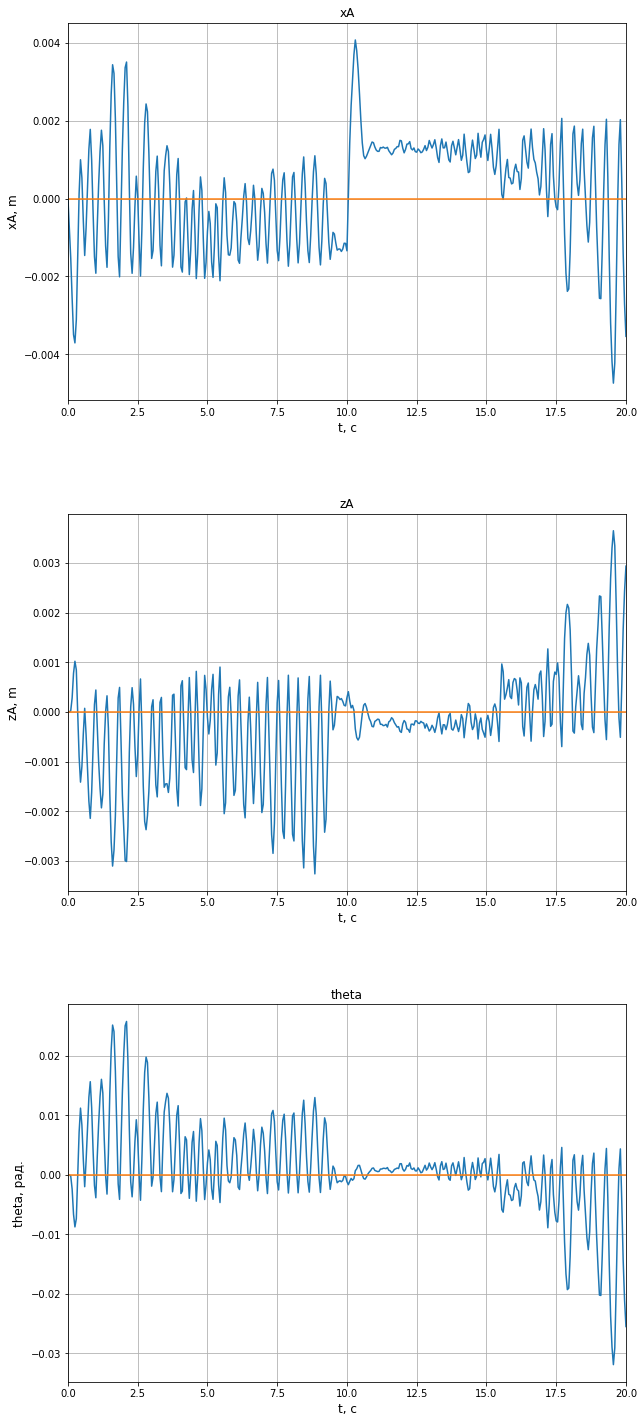

In [173]:
plot_x_z_theta(data2_diff)

#### Найдём СКО и мат. ожидание для разниц идеальных координат с реальными

In [174]:
def math_e(series):
  return series.sum()/len(series)

In [175]:
def s_dev(series, Math_e):
  return (sum((series - Math_e)**2)/len(series))**(1/2)

In [176]:
def get_table_Math_SKO(ddf):
  df_math_sko = pd.DataFrame({ 
     'xA': [math_e(ddf['xA']),
           s_dev(ddf['xA'], math_e(ddf['xA']))], 
     'zA': [math_e(ddf['zA']),
           s_dev(ddf['zA'], math_e(ddf['zA']))], 
     'theta': [math_e(ddf['theta']),
           s_dev(ddf['theta'], math_e(ddf['theta']))]},
      index=["Math_ir", "SKO_ir"])
  return df_math_sko

In [177]:
df_math_sko_2 = get_table_Math_SKO(data2_diff)
df_math_sko_2

,xA,zA,theta
Math_ir,0.000208,-0.000276,0.001083
SKO_ir,0.001394,0.001050,0.007342
